In [1]:
import numpy as np
import pandas as pd
import fs_qe as fq

# 1 data process

The imported sample is constructed with the strategy that picking up the US firm with firm-size (number of employees) data all available from 2020 to 2011. For details, please see the file ``09``.

In [2]:
df, df2, df3, df4 = fq.dataprocess(file='data_all/us_noe_all_postprocess.csv', var1='lognoe', var2='noe', var3='noe_mean')

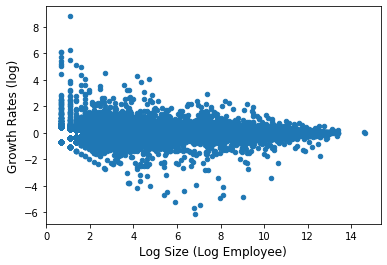

In [3]:
fq.scatterplot(df, x='lognoe', xlabel='Log Size (Log Employee)')

In [4]:
df5 = df2[df2['quantile_ex_1'] == pd.Interval(0.692, 3.219, closed='right') ]
df6 = df2[df2['quantile_ex_1'] == pd.Interval(3.219, 4.317, closed='right') ]
df7 = df2[df2['quantile_ex_1'] == pd.Interval(4.317, 6.045, closed='right') ]
df8 = df2[df2['quantile_ex_1'] == pd.Interval(6.045, 14.648, closed='right') ]

In [5]:
draw1 = np.array(round(df5['fgrow_log'], ndigits=2))
draw2 = np.array(round(df6['fgrow_log'], ndigits=2))
draw3 = np.array(round(df7['fgrow_log'], ndigits=2))
draw4 = np.array(round(df8['fgrow_log'], ndigits=2))
draw1

array([ 0.41,  2.3 , -0.69, ...,  0.04, -0.04, -0.27])

# 2 bar graphs and PDFs

## 2.1 bar graphs for mean and standard deviation of firm growth 

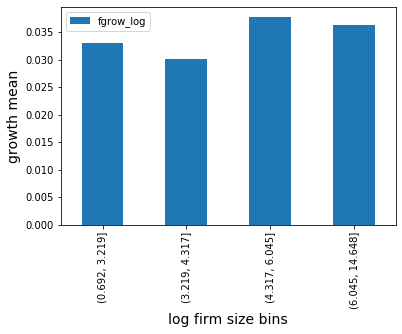

In [6]:
fq.plotbars(df3)

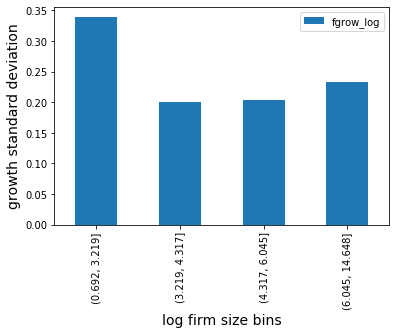

In [7]:
fq.plotbars(df4, ylabel='growth standard deviation')

## 2.2 PDFs for growth of firms in 4 bins above, respectively

The ``empirical func1`` shows the empirical PDF functions of firm growth for firms in **bin 1** above.

The ``empirical func2`` shows the empirical PDF functions of firm growth for firms in **bin 2** above.

The ``empirical func3`` shows the empirical PDF functions of firm growth for firms in **bin 3** above.

The ``empirical func4`` shows the empirical PDF functions of firm growth for firms in **bin 4** above.

In [8]:
d1 = fq.generating_pdf(draw1)
d2 = fq.generating_pdf(draw2)
d3 = fq.generating_pdf(draw3)
d4 = fq.generating_pdf(draw4)

In [9]:
x1 = d1['fgrow_mean']
x2 = d2['fgrow_mean']
x3 = d3['fgrow_mean']
x4 = d4['fgrow_mean']

y1 = d1['prob']
y2 = d2['prob']
y3 = d3['prob']
y4 = d4['prob']

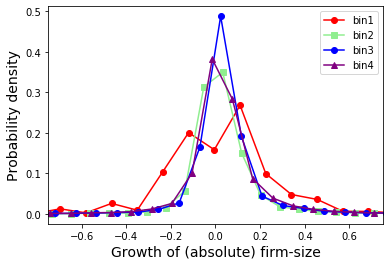

In [10]:
fq.density_plot(x1, x2, x3, x4, y1, y2, y3, y4)

# 3 tail index

In [11]:
s_dist1 = df.noe
s_dist2 = df.lognoe
s_dist3 = df.fgrow_log

The tail index for firm size distribution with firm size measured by number of employees is

In [12]:
fq.gabaix_est(s_dist1, c=0.01)

1.7586662397981836

The tail index for log firm size distribution with firm size measured by number of employees is

In [13]:
fq.gabaix_est(s_dist2, c=0.01)

21.06136251895593

The tail index for firm growth distribution with firm size measured by number of employees is

In [14]:
fq.gabaix_est(s_dist3, c=0.01)

2.2947971496470596

## 3.3 tail index for firm size distribution yearly from 2011 to 2020

In [15]:
n = 2011
N = 2018
while n <= N:
    x = df[df['year'] == n].noe
    if len(x) == 0 : 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

Tail index in year 2011 is 1.6718477390841868
Tail index in year 2012 is 1.7122486730025956
Tail index in year 2013 is 1.7055558937866095
Tail index in year 2014 is 1.6609156528858244
Tail index in year 2015 is 1.891894400128322
Tail index in year 2016 is 1.806924293306205
Tail index in year 2017 is 1.5907957878409398
Tail index in year 2018 is 1.7284258565459778


## 3.4 tail index for log firm size distribution yearly from 2011 to 2020

In [17]:
n = 2010
N = 2018
while n <= N:
    x = df[df['year'] == n].lognoe
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

None in year 2010
Tail index in year 2011 is 19.862547355329063
Tail index in year 2012 is 20.326535712517874
Tail index in year 2013 is 20.26842622138951
Tail index in year 2014 is 20.081376172819855
Tail index in year 2015 is 22.606894773381676
Tail index in year 2016 is 21.65446875951799
Tail index in year 2017 is 19.38325763187739
Tail index in year 2018 is 20.722337352680462


## 3.5 tail index for firm growth distribution yearly from 2011 to 2020

In [18]:
n = 2010
N = 2018
while n <= N:
    x = df[df['year'] == n].fgrow_log
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

None in year 2010
Tail index in year 2011 is 2.4931259656590425
Tail index in year 2012 is 2.056343665526054
Tail index in year 2013 is 2.4090226886835255
Tail index in year 2014 is 2.415323913074562
Tail index in year 2015 is 2.4413344096038037
Tail index in year 2016 is 2.0643680268949236
Tail index in year 2017 is 2.322878610385123
Tail index in year 2018 is 1.9989596741128017
